# 8. 이미지를 위한 인공 신경망

### 합성곱 convolution

- 입력 데이터에서 유용한 특성만 드러나게 처리하는 것

### 합성곱의 동작 원리

- 입력 데이터 전체에 가중치를 적용하는 게 아니라 일부에 가중치를 곱함
- CNN Convolutional Neural Network에서는 뉴런을 filter/kernel라고 부름
- 필터 filter: 뉴련 개수를 표현할 때
- 커널 kernel: 입력에 곱하는 가중치를 의미할 때
- 합성곱은 2차원 데이터에도 적용할 수 있다. 

![image](https://user-images.githubusercontent.com/81140673/224218029-29cf267c-da2c-4ea7-acc0-b7ad2ede7dce.png)

- 입력 데이터의 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만들어낸다
- 이때 Convolutional 계산을 통해 어든 출력을 Feature map 특성 맵이라고 한다. 

## 8-3. 합성곱 신경망의 시각화

- 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위한 시각화 방식
- 함수형 API를 사용

가중치 시각화

In [22]:
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")

모델 레이어 출력하기

In [23]:
model.layers

첫번째 합성곱 층의 가중치

In [24]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


가중치 분포 시각화하기

In [25]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019598104 0.20855865


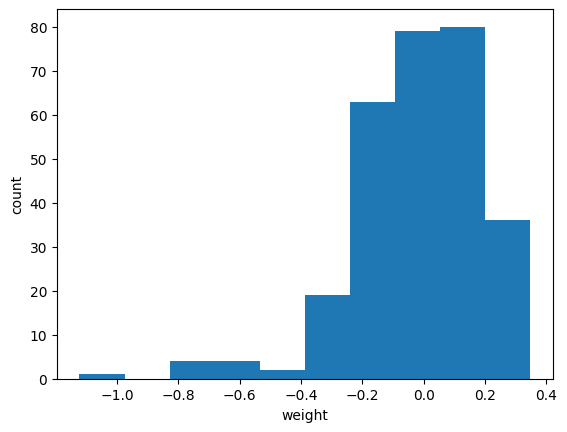

In [26]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

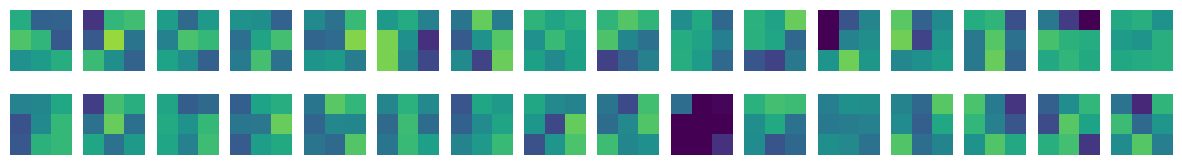

In [27]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis("off")
plt.show()

함수형 api

In [28]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [29]:
conv_acti = keras.Model(model.input, model.layers[0].output)

특성맵 시각화

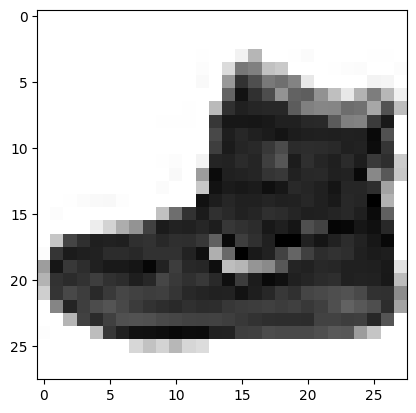

In [30]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap="gray_r")
plt.show()

In [31]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

1/1 [==============================] - 0s 63ms/step
(1, 28, 28, 32)


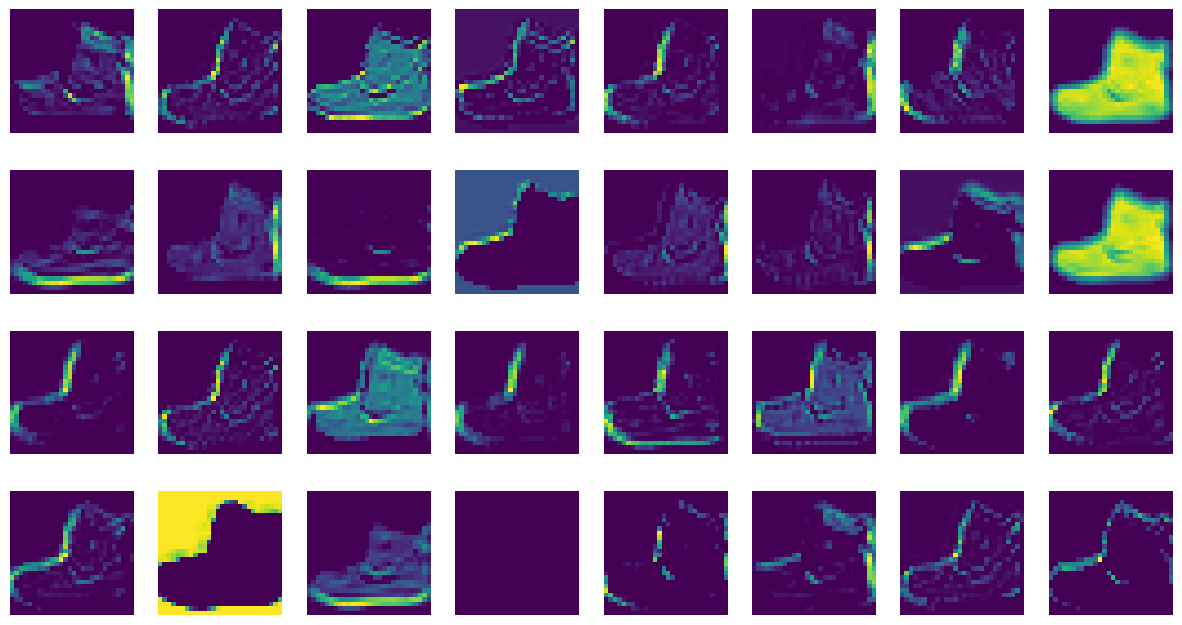

In [32]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis("off")
plt.show()

In [33]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

print(feature_maps.shape)

1/1 [==============================] - 0s 141ms/step
(1, 14, 14, 64)


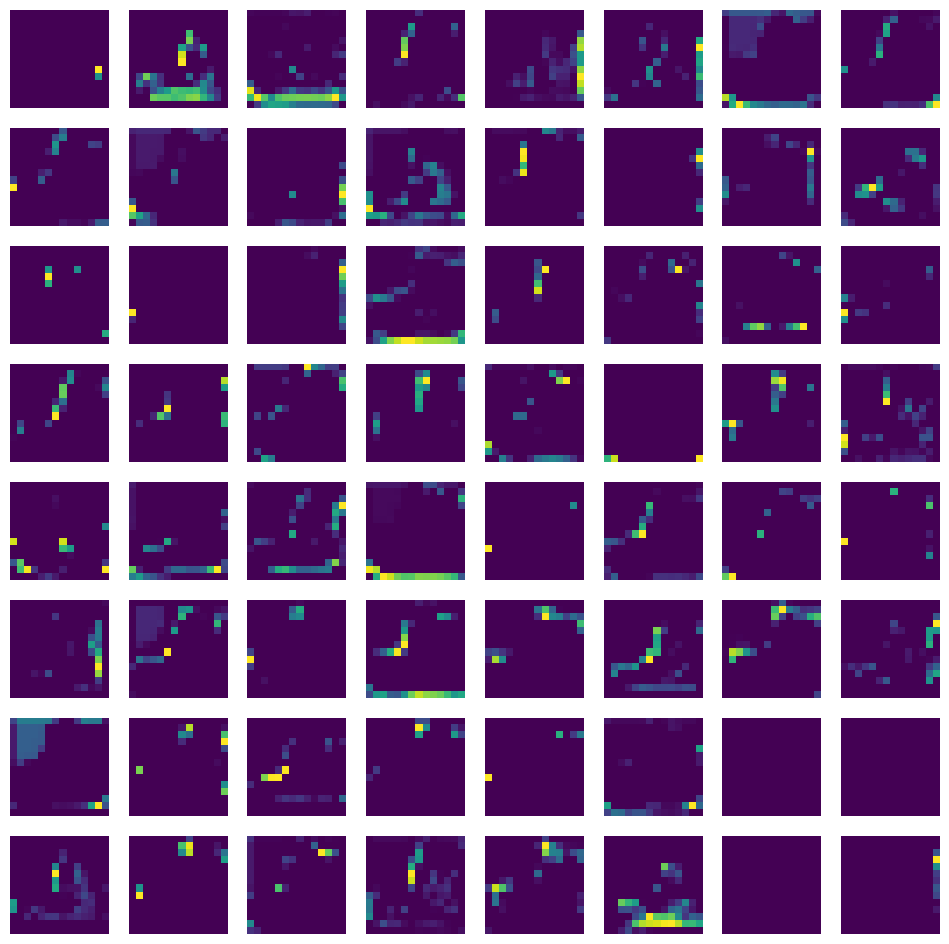

In [34]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis("off")
plt.show()